In [4]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

import zipfile
import os

In [5]:
# usar gdown para directorio compartido
!pip install gdown
!pip install gdown --upgrade
import gdown


In [6]:
!pip install scikeras

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ID del directorio compartido
#file_id = '1Nctz6XZLJnagsPQSfyOKoeVDk-QVaJ-T'
#url = f'https://drive.google.com/uc?id={file_id}'

# Descarga del archivo ZIP en entorno Colab por límite de gdown
# es necesario traerlo comprimido
#gdown.download(url, quiet=False)

In [7]:
from PIL import Image
import random

In [8]:
# Función para aplicar data augmentation con el fin de generalizar el modelo (esto se hace ya que está dando accuracys muy bajos)

def augment_image(imagen):
    # Rotación aleatoria
    if random.random() < 0.5:
        angle = random.randint(-40, 40)
        imagen = imagen.rotate(angle)

    # Desplazamiento aleatorio
    if random.random() < 0.5:
        width_shift = random.randint(-20, 20)
        height_shift = random.randint(-20, 20)
        imagen = imagen.transform(imagen.size, Image.AFFINE, (1, 0, width_shift, 0, 1, height_shift))

    # Zoom aleatorio
    if random.random() < 0.5:
        zoom = random.uniform(0.8, 1.2)
        width, height = imagen.size
        imagen = imagen.resize((int(width * zoom), int(height * zoom)), Image.LANCZOS)

    # Volteo horizontal aleatorio
    if random.random() < 0.5:
        imagen = imagen.transpose(Image.FLIP_LEFT_RIGHT)

    return imagen


In [9]:
# Ruta al archivo ZIP en tu Google Drive
ruta_zip = "C:\\AmaruAyelen\\proyectos\\PythonDataScienceMachineLearning\\PythonDataScienceMachineLearning\\bootcampIA\\WeaponDetectionProject\\img.zip"

# Directorio donde se extraerán las imágenes
output_dir = "C:\\AmaruAyelen\\proyectos\\PythonDataScienceMachineLearning\\PythonDataScienceMachineLearning\\bootcampIA\\WeaponDetectionProject\\extraidas"

# Verificar y crear el directorio principal
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directorio creado: {output_dir}")

# Verificar si el archivo ZIP existe
if os.path.exists(ruta_zip):
    print("El archivo ZIP existe. Procediendo a extraer...")

    # Extraer el archivo ZIP
    with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
        zip_ref.extractall(output_dir)

    print("Extracción completa. Archivos extraídos:")
    archivos_extraidos = os.listdir(output_dir)
    print(archivos_extraidos)

    # Crear directorios para las imágenes redimensionadas
    redimensionadas_dir = os.path.join(output_dir, 'redimensionadas')

    # Crear las carpetas dentro de "redimensionadas" para 'sin_arma' y 'con_arma'
    redimensionadas_sin_arma_dir = os.path.join(redimensionadas_dir, 'sin_arma')
    redimensionadas_con_arma_dir = os.path.join(redimensionadas_dir, 'con_arma')

    # Crear los directorios si no existen
    os.makedirs(redimensionadas_sin_arma_dir, exist_ok=True)
    os.makedirs(redimensionadas_con_arma_dir, exist_ok=True)

    print(f"Carpetas 'redimensionadas/sin_arma' y 'redimensionadas/con_arma' creadas dentro de {redimensionadas_dir}.")

    # Función para procesar imágenes dentro de las subcarpetas 'sin_arma' y 'con_arma'
    def procesar_imagenes_en_subcarpeta(subcarpeta, redimensionadas_etiqueta_dir):
        for nombre_archivo in os.listdir(subcarpeta):
            ruta_imagen_original = os.path.join(subcarpeta, nombre_archivo)
            # Verificar si es un archivo de imagen
            if os.path.isfile(ruta_imagen_original) and nombre_archivo.endswith(('.png', '.jpg', '.jpeg')):
                try:
                    # Abrir y redimensionar la imagen
                    imagen = Image.open(ruta_imagen_original)
                    nuevo_tamaño = (200, 200)
                    imagen_redimensionada = imagen.resize(nuevo_tamaño)

                    # Aplicar data augmentation
                    imagen_aumentada = augment_image(imagen_redimensionada)

                    # Guardar la imagen redimensionada en la subcarpeta correspondiente
                    ruta_salida_redimensionada = os.path.join(redimensionadas_etiqueta_dir, nombre_archivo)
                    imagen_redimensionada.save(ruta_salida_redimensionada)
                    print(f"Imagen redimensionada guardada en: {ruta_salida_redimensionada}")

                except Exception as e:
                    print(f"Error procesando {nombre_archivo}: {e}")

    # Procesar las imágenes dentro de 'sin_arma' y 'con_arma' dentro de redimensionadas
    for carpeta in ['sin_arma', 'con_arma']:
        subcarpeta_path = os.path.join(output_dir, carpeta)
        redimensionadas_etiqueta_dir = os.path.join(redimensionadas_dir, carpeta)
        if os.path.exists(subcarpeta_path):
            print(f"Procesando imágenes en la subcarpeta: {subcarpeta_path}")
            procesar_imagenes_en_subcarpeta(subcarpeta_path, redimensionadas_etiqueta_dir)
        else:
            print(f"La subcarpeta {subcarpeta_path} no existe.")
else:
    print("El archivo ZIP no se encontró en la ruta especificada.")


El archivo ZIP existe. Procediendo a extraer...
Extracción completa. Archivos extraídos:
['con_arma', 'redimensionadas', 'sin_arma']
Carpetas 'redimensionadas/sin_arma' y 'redimensionadas/con_arma' creadas dentro de C:\AmaruAyelen\proyectos\PythonDataScienceMachineLearning\PythonDataScienceMachineLearning\bootcampIA\WeaponDetectionProject\extraidas\redimensionadas.
Procesando imágenes en la subcarpeta: C:\AmaruAyelen\proyectos\PythonDataScienceMachineLearning\PythonDataScienceMachineLearning\bootcampIA\WeaponDetectionProject\extraidas\sin_arma
Imagen redimensionada guardada en: C:\AmaruAyelen\proyectos\PythonDataScienceMachineLearning\PythonDataScienceMachineLearning\bootcampIA\WeaponDetectionProject\extraidas\redimensionadas\sin_arma\image_1.jpg
Imagen redimensionada guardada en: C:\AmaruAyelen\proyectos\PythonDataScienceMachineLearning\PythonDataScienceMachineLearning\bootcampIA\WeaponDetectionProject\extraidas\redimensionadas\sin_arma\image_10.jpg
Imagen redimensionada guardada en: 

In [10]:
# Listado de las imágenes almacenarlas y etiquetarlas
imagenes = []
etiquetas = []
nuevo_tamaño = (200, 200)

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from re import X

In [12]:
# Cargado y etiquetado de imágenes de la carpeta "con_arma"
for archivo in os.listdir(redimensionadas_con_arma_dir):
    imagen_path = os.path.join(redimensionadas_con_arma_dir, archivo)
    imagen = load_img(imagen_path, target_size=nuevo_tamaño)
    imagen_array = img_to_array(imagen)
    imagen_array /= 255.0  # Normalización aquí
    imagenes.append(imagen_array)
    etiquetas.append(1)  # Etiqueta 1 para "con arma"
    
# Cargar y etiquetar imágenes de la carpeta "sin_arma"
for archivo in os.listdir(redimensionadas_sin_arma_dir):
    imagen_path = os.path.join(redimensionadas_sin_arma_dir, archivo)
    imagen = load_img(imagen_path, target_size=nuevo_tamaño)
    imagen_array = img_to_array(imagen)
    imagen_array /= 255.0  # Normalización aquí
    imagenes.append(imagen_array)
    etiquetas.append(0)  # Etiqueta 0 para "sin arma"

# Convertir listas a arrays de NumPy y normalizar **
X = np.array(imagenes)
y = np.array(etiquetas)

print(f"Datos cargados: {X.shape}, Etiquetas: {y.shape}")

Datos cargados: (557, 200, 200, 3), Etiquetas: (557,)


In [13]:
# Partición inicial para obtener validación
X_train_test, X_val, y_train_test, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Luego, partición de los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.2, random_state=42, stratify=y_train_test)

In [14]:
X_train_test

array([[[[0.7607843 , 0.5882353 , 0.39607844],
         [0.77254903, 0.6       , 0.40784314],
         [0.7882353 , 0.6156863 , 0.42352942],
         ...,
         [0.85882354, 0.7372549 , 0.5137255 ],
         [0.84313726, 0.72156864, 0.5058824 ],
         [0.8509804 , 0.7294118 , 0.5176471 ]],

        [[0.84705883, 0.6745098 , 0.48235294],
         [0.8352941 , 0.6627451 , 0.47058824],
         [0.84313726, 0.67058825, 0.47843137],
         ...,
         [0.8       , 0.6784314 , 0.45490196],
         [0.84705883, 0.7254902 , 0.50980395],
         [0.8901961 , 0.76862746, 0.5568628 ]],

        [[0.7647059 , 0.5921569 , 0.40784314],
         [0.73333335, 0.56078434, 0.3764706 ],
         [0.7529412 , 0.5803922 , 0.39607844],
         ...,
         [0.88235295, 0.7529412 , 0.5411765 ],
         [0.9098039 , 0.78039217, 0.5686275 ],
         [0.9137255 , 0.78431374, 0.5764706 ]],

        ...,

        [[0.5529412 , 0.49411765, 0.41960785],
         [0.54509807, 0.4862745 , 0.4117647 ]

In [15]:
X_train

array([[[[0.2901961 , 0.38039216, 0.16078432],
         [0.29803923, 0.38039216, 0.16078432],
         [0.29803923, 0.38039216, 0.16078432],
         ...,
         [0.42352942, 0.43529412, 0.4       ],
         [0.4       , 0.4117647 , 0.36862746],
         [0.35686275, 0.3647059 , 0.32156864]],

        [[0.29411766, 0.38431373, 0.16470589],
         [0.3019608 , 0.38431373, 0.16470589],
         [0.3019608 , 0.38431373, 0.16470589],
         ...,
         [0.41960785, 0.43137255, 0.39607844],
         [0.39607844, 0.40784314, 0.37254903],
         [0.3529412 , 0.36078432, 0.31764707]],

        [[0.3019608 , 0.38431373, 0.16470589],
         [0.3019608 , 0.38431373, 0.16470589],
         [0.3019608 , 0.38431373, 0.16470589],
         ...,
         [0.41960785, 0.43137255, 0.39607844],
         [0.3882353 , 0.4       , 0.3647059 ],
         [0.34509805, 0.3529412 , 0.30980393]],

        ...,

        [[0.08627451, 0.05490196, 0.04705882],
         [0.11372549, 0.08235294, 0.07450981]

In [16]:
y_val

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [17]:
# Mostrar las dimensiones de los conjuntos de validación, entrenamiento y prueba
print(f"Conjunto de entrenamiento: {X_val.shape}, {y_val.shape}")
print(f"Conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}, {y_test.shape}")

Conjunto de entrenamiento: (56, 200, 200, 3), (56,)
Conjunto de entrenamiento: (400, 200, 200, 3), (400,)
Conjunto de prueba: (101, 200, 200, 3), (101,)


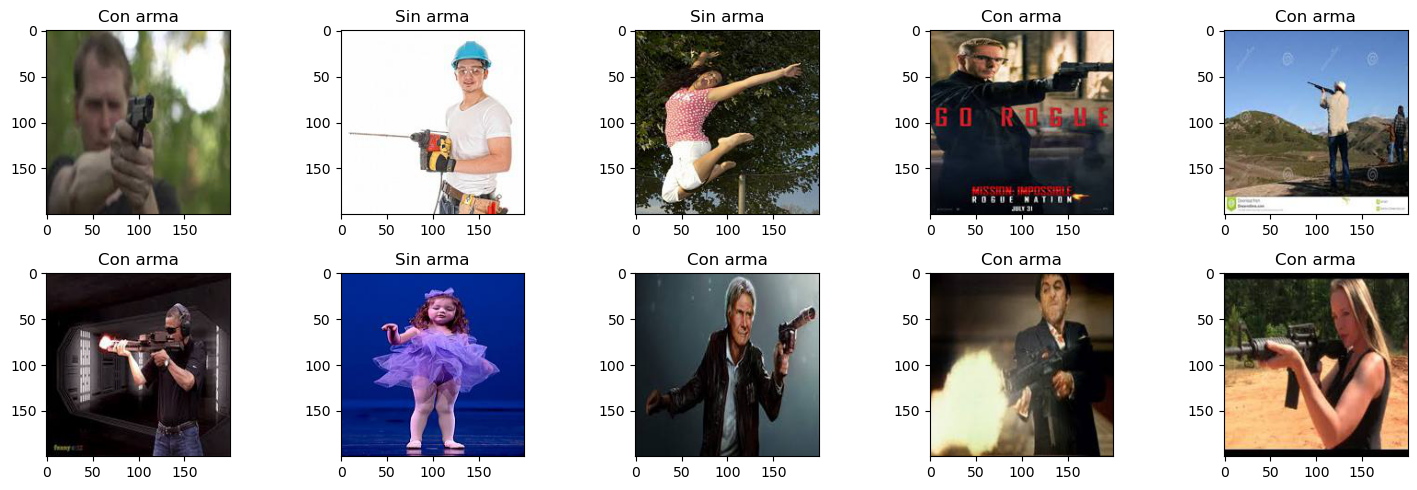

In [18]:
# Función para graficar imágenes
def graficar_imagenes(X, y, cantidad=10):
    plt.figure(figsize=(15, 5))

    for i in range(cantidad):
        plt.subplot(2, cantidad//2, i + 1)
        plt.imshow(X[i])
        plt.title("Con arma" if y[i] == 1 else "Sin arma")
        plt.axis("on")  # ejes

    plt.tight_layout()
    plt.show()

# Muestra de 10 imágenes del conjunto de entrenamiento
graficar_imagenes(X_train, y_train, cantidad=10)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.regularizers import l2

In [200]:
# Función para crear el modelo con Dropout
def create_model(dropout_rate=0.5, learning_rate=0.001, l2_reg=0.01):
    input_shape = (200, 200, 3)  # Cambia según el tamaño de tus imágenes
    input_layer = Input(shape=input_shape)

    # Bloque convolucional de múltiples escalas
    def bloque_convolucional(input_tensor):
        filtro1x1 = Conv2D(32, (1, 1), activation='relu', padding='same')(input_tensor)
        filtro3x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
        filtro5x5 = Conv2D(32, (5, 5), activation='relu', padding='same')(input_tensor)
        salida = concatenate([filtro1x1, filtro3x3, filtro5x5], axis=-1)
        return salida

    # Aplicar el bloque convolucional con Dropout
    x = bloque_convolucional(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = bloque_convolucional(x)
    x = MaxPooling2D((2, 2))(x)

    # Aplanar y añadir capas densas con Dropout y L2
    x = Flatten()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    # Crear y compilar el modelo
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [201]:
# Wrapper de scikeras para el modelo de Keras
model = KerasClassifier(model=create_model, verbose=1)

# Definición de hiperparámetros para Grid Search
param_grid = {
    'model__dropout_rate': [0.3, 0.5],
    'model__learning_rate': [0.001],
    'model__l2_reg': [0.01, 0.001],  # Incluye opciones para regularización L2
    'batch_size': [16, 32],
    'epochs': [10]
}

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Configuración de GridSearchCV
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', error_score='raise')
grid = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy', 
    error_score='raise',
    cv=[(slice(None), slice(None))]  # Sin validación cruzada, usa la partición de validación definida
)

# Ejecución de la búsqueda de hiperparámetros
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[early_stopping])


# Mejor combinación de hiperparámetros
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.5295 - loss: 6.7701 - val_accuracy: 0.6786 - val_loss: 3.2479
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5647 - loss: 2.8995 - val_accuracy: 0.6429 - val_loss: 2.0467
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6810 - loss: 1.9065 - val_accuracy: 0.6250 - val_loss: 1.5618
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6646 - loss: 1.4876 - val_accuracy: 0.7143 - val_loss: 1.2734
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7363 - loss: 1.2346 - val_accuracy: 0.8214 - val_loss: 1.1515
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7507 - loss: 1.1522 - val_accuracy: 0.6964 - val_loss: 1.0991
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7857 - loss: 1.0529 - val_accuracy: 0.8036 - val_loss: 1.0307
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8271 - loss: 0.9206 - val_accuracy: 0.6786 - val_loss:

In [203]:
mejor_modelo = grid.best_estimator_

# Evaluar el modelo en el conjunto de validación
val_accuracy = mejor_modelo.score(X_val, y_val)
print(f"Precisión en el conjunto de validación: {val_accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step
Precisión en el conjunto de validación: 0.6786


In [204]:
# Evaluar el mejor modelo encontrado en el conjunto de validación
best_model = grid_result.best_estimator_.model_
val_loss, val_accuracy = best_model.evaluate(X_val, y_val, verbose=0)

print(f"Loss en validación: {val_loss}")
print(f"Accuracy en validación: {val_accuracy}")

Loss en validación: 1.2578479051589966
Accuracy en validación: 0.6785714030265808


In [53]:
# Convertir y_pred a una sola dimensión:

y_pred = y_pred.ravel()
df_comparaciones = pd.DataFrame({
    'Predicciones': y_pred,
    'Valores Reales': y_val
})
df_comparaciones.head(5)

,Predicciones,Valores Reales
0,1,1
1,1,1
2,1,1
3,1,0
4,0,0


C:\Users\AMARU\AppData\Local\Temp\ipykernel_2196\3959977933.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_comparaciones, ci=None)


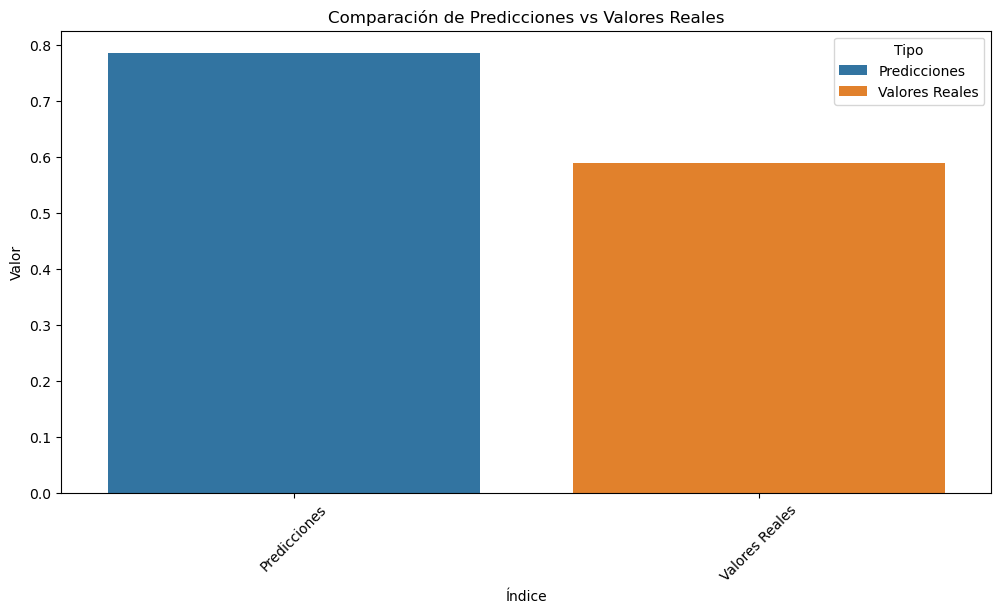

In [206]:
# Crear una gráfica de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_comparaciones, ci=None)

# Configurar los títulos y etiquetas
plt.title('Comparación de Predicciones vs Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(title='Tipo', labels=['Predicciones', 'Valores Reales'])

# Mostrar la gráfica
plt.show()

In [ ]:
df_comparaciones = pd.DataFrame(y_pred,y_val)

# PRUEBAS CAMBIANDO LA ARQUITECTURA DE RED

# PRUEBAS CON DIFERENTES ARQUIECTURAS DE RED:

In [20]:
from tensorflow.keras.layers import BatchNormalization

In [21]:
# Función para crear el modelo con Dropout y Batch Normalization
def create_model(dropout_rate=0.5, learning_rate=0.001, l2_reg=0.01):
    input_shape = (200, 200, 3)  # Cambia según el tamaño de tus imágenes
    input_layer = Input(shape=input_shape)

    # Bloque convolucional de múltiples escalas
    def bloque_convolucional(input_tensor):
        filtro1x1 = Conv2D(16, (1, 1), activation='relu', padding='same')(input_tensor)
        filtro3x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_tensor)
        filtro5x5 = Conv2D(16, (5, 5), activation='relu', padding='same')(input_tensor)
        salida = concatenate([filtro1x1, filtro3x3, filtro5x5], axis=-1)
        return salida

    # Aplicar el bloque convolucional con Dropout
    x = bloque_convolucional(input_layer)
    x = BatchNormalization()(x)  # Normalización por lotes
    x = MaxPooling2D((2, 2))(x)

    x = bloque_convolucional(x)
    x = BatchNormalization()(x)  # Normalización por lotes
    x = MaxPooling2D((2, 2))(x)

    # Aplanar y añadir capas densas con Dropout y L2
    x = Flatten()(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(32, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    # Crear y compilar el modelo
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [23]:
class HyperparameterLogger(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()

    def on_train_begin(self, logs=None):
        # Aquí accedemos a los hiperparámetros del modelo
        params = self.model.get_config()  # Obtiene la configuración del modelo
        print("Training with the following parameters:")
        print(f"Dropout Rate: {self.params['model__dropout_rate']}")
        print(f"Learning Rate: {self.params['model__learning_rate']}")
        print(f"L2 Regularization: {self.params['model__l2_reg']}")
        print(f"Batch Size: {self.params['batch_size']}")
        print(f"Epochs: {self.params['epochs']}\n")


Con el anterior modelo las métricas fueron:

Fitting 1 folds for each of 8 candidates, totalling 8 fits
[CV 1/1] END batch_size=16, epochs=10, model__dropout_rate=0.3, model__l2_reg=0.01, model__learning_rate=0.001;, score=0.797 total time= 2.8min
[CV 1/1] END batch_size=16, epochs=10, model__dropout_rate=0.3, model__l2_reg=0.001, model__learning_rate=0.001;, score=0.705 total time= 3.0min
[CV 1/1] END batch_size=16, epochs=10, model__dropout_rate=0.5, model__l2_reg=0.01, model__learning_rate=0.001;, score=0.740 total time= 3.0min
[CV 1/1] END batch_size=16, epochs=10, model__dropout_rate=0.5, model__l2_reg=0.001, model__learning_rate=0.001;, score=0.662 total time= 3.0min
[CV 1/1] END batch_size=32, epochs=10, model__dropout_rate=0.3, model__l2_reg=0.01, model__learning_rate=0.001;, score=0.770 total time= 2.8min
[CV 1/1] END batch_size=32, epochs=10, model__dropout_rate=0.3, model__l2_reg=0.001, model__learning_rate=0.001;, score=0.705 total time= 2.7min
[CV 1/1] END batch_size=32, epochs=10, model__dropout_rate=0.5, model__l2_reg=0.01, model__learning_rate=0.001;, score=0.620 total time= 2.9min
[CV 1/1] END batch_size=32, epochs=10, model__dropout_rate=0.5, model__l2_reg=0.001, model__learning_rate=0.001;, score=0.575 total time= 3.0min

Siendo la mejor combinación:

[CV 1/1] END batch_size=16, epochs=10, model__dropout_rate=0.3, model__l2_reg=0.01, model__learning_rate=0.001;, score=0.797 total time= 2.8min

# Modificación a una red un poco más compleja:

In [27]:
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, concatenate, Add

In [31]:
# Función para crear el modelo con Dropout y Batch Normalization
def create_model(dropout_rate=0.5, learning_rate=0.001, l2_reg=0.01):
    input_shape = (200, 200, 3)  # Cambia según el tamaño de tus imágenes
    input_layer = Input(shape=input_shape)

    # Bloque convolucional de múltiples escalas
    def bloque_convolucional(input_tensor):
        filtro1x1 = Conv2D(32, (1, 1), activation='relu', padding='same')(input_tensor)
        filtro3x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_tensor)
        filtro5x5 = Conv2D(128, (5, 5), activation='relu', padding='same')(input_tensor)
        salida = concatenate([filtro1x1, filtro3x3, filtro5x5], axis=-1)
        return salida

    # Aplicar el bloque convolucional con Dropout
    x = bloque_convolucional(input_layer)
    x = BatchNormalization()(x)  # Normalización por lotes
    x = MaxPooling2D((2, 2))(x)

    x = bloque_convolucional(x)
    x = BatchNormalization()(x)  # Normalización por lotes
    x = MaxPooling2D((2, 2))(x)

    # Aplanar y añadir capas densas con Dropout y L2
    x = Flatten()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    # Crear y compilar el modelo
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 243s 9s/step - accuracy: 0.5721 - loss: 61.1837 - val_accuracy: 0.5179 - val_loss: 25.2203
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 263s 11s/step - accuracy: 0.6734 - loss: 61.3801 - val_accuracy: 0.5714 - val_loss: 24.5750
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 243s 10s/step - accuracy: 0.6553 - loss: 73.6106 - val_accuracy: 0.6429 - val_loss: 21.2644
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 255s 10s/step - accuracy: 0.7536 - loss: 35.7254 - val_accuracy: 0.6607 - val_loss: 19.1019
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 251s 10s/step - accuracy: 0.7691 - loss: 37.5306 - val_accuracy: 0.6250 - val_loss: 20.3725
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 256s 10s/step - accuracy: 0.7938 - loss: 27.7927 - val_accuracy: 0.6607 - val_loss: 21.0617
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 253s 10s/step - accuracy: 0.7496 - loss: 33.5018 - val_accuracy: 0.6429 - val_loss: 46.2962
Loss: 19.1019, Accuracy: 0.6607


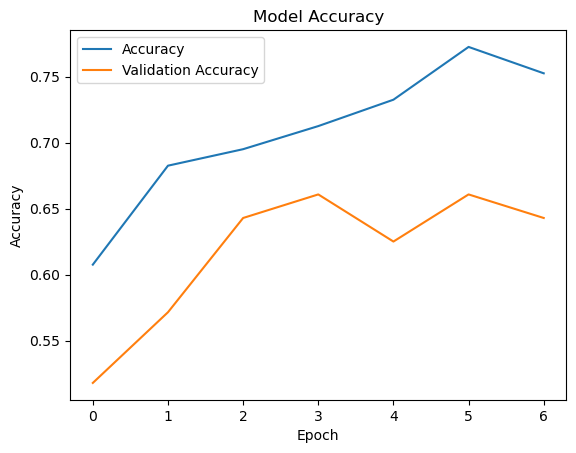

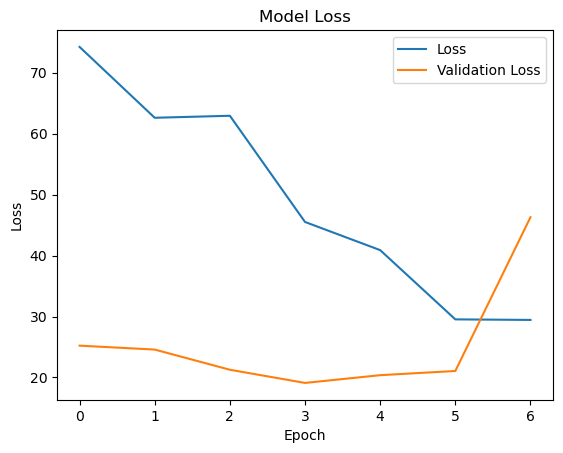

In [32]:
# Supongamos que ya tienes tus datos preparados: X_train, y_train, X_val, y_val

# Paso 2: Crea el modelo
model = create_model(dropout_rate=0.3, learning_rate=0.001, l2_reg=0.001)

# Paso 3: Configura Early Stopping (opcional)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Paso 4: Entrena el modelo
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=10, 
    batch_size=16, 
    callbacks=[early_stopping],
    verbose=1
)

# Paso 5: Evalúa el modelo
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Paso 6: Opcional: Graficar la historia del entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [33]:
# Función para crear el modelo con Dropout y Batch Normalization
def create_model(dropout_rate=0.5, learning_rate=0.001, l2_reg=0.01):
    input_shape = (200, 200, 3)  # Cambia según el tamaño de tus imágenes
    input_layer = Input(shape=input_shape)

    # Bloque convolucional de múltiples escalas
    def bloque_convolucional(input_tensor):
        filtro1x1 = Conv2D(32, (1, 1), activation='relu', padding='same')(input_tensor)
        filtro3x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_tensor)
        filtro5x5 = Conv2D(128, (5, 5), activation='relu', padding='same')(input_tensor)
        salida = concatenate([filtro1x1, filtro3x3, filtro5x5], axis=-1)
        return salida

    # Aplicar el bloque convolucional con Dropout
    x = bloque_convolucional(input_layer)
    x = BatchNormalization()(x)  # Normalización por lotes
    x = MaxPooling2D((2, 2))(x)

    x = bloque_convolucional(x)
    x = BatchNormalization()(x)  # Normalización por lotes
    x = MaxPooling2D((2, 2))(x)

    # Aplanar y añadir capas densas con Dropout y L2
    x = Flatten()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    # Crear y compilar el modelo
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 241s 9s/step - accuracy: 0.6766 - loss: 57.2091 - val_accuracy: 0.4464 - val_loss: 135.4338
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 254s 10s/step - accuracy: 0.7716 - loss: 44.5307 - val_accuracy: 0.4643 - val_loss: 70.4856
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 246s 10s/step - accuracy: 0.8563 - loss: 27.8043 - val_accuracy: 0.5714 - val_loss: 70.6648
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 243s 10s/step - accuracy: 0.8290 - loss: 26.9055 - val_accuracy: 0.5893 - val_loss: 36.9956
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 239s 10s/step - accuracy: 0.8861 - loss: 23.6838 - val_accuracy: 0.4286 - val_loss: 76.6154
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 244s 10s/step - accuracy: 0.8400 - loss: 24.6635 - val_accuracy: 0.5000 - val_loss: 55.9818
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 249s 10s/step - accuracy: 0.9071 - loss: 13.8936 - val_accuracy: 0.6607 - val_loss: 38.0657
Loss: 36.9956, Accuracy: 0.5893


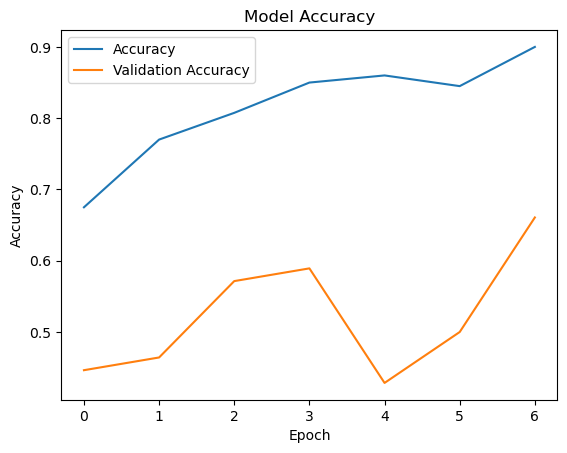

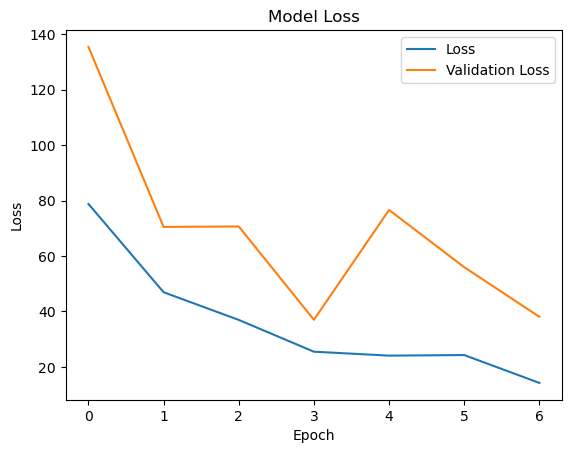

In [34]:
# Paso 2: Crea el modelo
model = create_model(dropout_rate=0.3, learning_rate=0.001, l2_reg=0.001)

# Paso 3: Configura Early Stopping (opcional)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Paso 4: Entrena el modelo
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=10, 
    batch_size=16, 
    callbacks=[early_stopping],
    verbose=1
)

# Paso 5: Evalúa el modelo
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Paso 6: Opcional: Graficar la historia del entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [65]:
# MISMO CÓDIGO ANTERIOR PERO OPTIMIZADO PARA LOS WARNINGS QUE GENERÓ:

# Función para crear el modelo con reducción de retracing
def create_model(dropout_rate=0.5, learning_rate=0.001):
    input_shape = (200, 200, 3)
    input_layer = Input(shape=input_shape)

    # Decorar la función de bloque convolucional con @tf.function y reducir retracing
    def bloque_convolucional(input_tensor):
        filtro1x1 = Conv2D(32, (1, 1), activation='relu', padding='same')(input_tensor)
        filtro3x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
        filtro5x5 = Conv2D(32, (5, 5), activation='relu', padding='same')(input_tensor)
        salida = concatenate([filtro1x1, filtro3x3, filtro5x5], axis=-1)
        return salida

    # Aplicación del bloque convolucional
    x = bloque_convolucional(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = bloque_convolucional(x)
    x = MaxPooling2D((2, 2))(x)

    # Capas densas y Dropout
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [66]:

test_model = create_model()
test_model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5027 - loss: 1049.1355 - val_accuracy: 0.5893 - val_loss: 1.5242
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.4643 - loss: 3.9905 - val_accuracy: 0.6071 - val_loss: 0.7553
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5800 - loss: 0.7346 - val_accuracy: 0.5893 - val_loss: 0.7714
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7094 - loss: 0.6268 - val_accuracy: 0.5714 - val_loss: 0.7668
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6856 - loss: 0.6214 - val_accuracy: 0.6071 - val_loss: 0.7751
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7329 - loss: 0.5770 - val_accuracy: 0.6071 - val_loss: 0.7765
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8040 - loss: 0.4380 - val_accuracy: 0.5893 - val_loss: 0.7815
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7779 - loss: 0.4957 - val_accuracy: 0.6250 - val_lo

# Implementación de arquitectura usando Regularización y Early Stopping:

Parámetros usados:

dropout_rate = 0.5

learning_rate=0.001

l2_reg=0.01


In [67]:
from keras.regularizers import l2

In [68]:
# Función para crear el modelo
def create_model(dropout_rate=0.5, learning_rate=0.001, l2_reg=0.01):
    input_shape = (200, 200, 3)
    input_layer = Input(shape=input_shape)

    def bloque_convolucional(input_tensor):
        filtro1x1 = Conv2D(32, (1, 1), activation='relu', padding='same')(input_tensor)
        filtro3x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
        filtro5x5 = Conv2D(32, (5, 5), activation='relu', padding='same')(input_tensor)
        salida = concatenate([filtro1x1, filtro3x3, filtro5x5], axis=-1)
        return salida

    x = bloque_convolucional(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = bloque_convolucional(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [69]:
# Configuración del EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Crear el modelo
model = create_model(dropout_rate=0.5, learning_rate=0.001, l2_reg=0.01)

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluación del modelo
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Predicción
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convertir probabilidades a clases (0 o 1)

# Almacenamiento de las predicciones
predictions_df = pd.DataFrame({'Predicted': y_pred_classes.flatten(), 'True': y_val.flatten()})
print(predictions_df.head())

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5106 - loss: 833.6093 - val_accuracy: 0.4107 - val_loss: 68.8697
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5284 - loss: 84.6061 - val_accuracy: 0.5893 - val_loss: 7.9426
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6267 - loss: 8.4379 - val_accuracy: 0.5893 - val_loss: 8.8126
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.6167 - loss: 8.5776 - val_accuracy: 0.5893 - val_loss: 8.2691
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.5844 - loss: 8.2284 - val_accuracy: 0.5893 - val_loss: 8.0813
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step - accuracy: 0.5595 - loss: 7.9448
Validation Loss: 7.942579746246338, Validation Accuracy: 0.5892857313156128
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 682ms/step
   Predicted  True
0          1     1
1          1     1
2          1     1
3          1     0
4          1     0


Parámetros usados:

dropout_rate = 0.3

learning_rate=0.01

l2_reg=0.001

In [70]:
# Función para crear el modelo
def create_model(dropout_rate=0.3, learning_rate=0.01, l2_reg=0.001):
    input_shape = (200, 200, 3)
    input_layer = Input(shape=input_shape)

    def bloque_convolucional(input_tensor):
        filtro1x1 = Conv2D(32, (1, 1), activation='relu', padding='same')(input_tensor)
        filtro3x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
        filtro5x5 = Conv2D(32, (5, 5), activation='relu', padding='same')(input_tensor)
        salida = concatenate([filtro1x1, filtro3x3, filtro5x5], axis=-1)
        return salida

    x = bloque_convolucional(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = bloque_convolucional(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [71]:
# Configuración del EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Crear el modelo
model = create_model(dropout_rate=0.5, learning_rate=0.001, l2_reg=0.01)

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping]
)

# Evaluación del modelo
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Predicción
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convertir probabilidades a clases (0 o 1)

# Almacenamiento de las predicciones
predictions_df = pd.DataFrame({'Predicted': y_pred_classes.flatten(), 'True': y_val.flatten()})
print(predictions_df.head())

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 73s 8s/step - accuracy: 0.5379 - loss: 570.9594 - val_accuracy: 0.5893 - val_loss: 70.6903
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.5436 - loss: 97.2609 - val_accuracy: 0.5893 - val_loss: 25.8186
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.5485 - loss: 37.4461 - val_accuracy: 0.3929 - val_loss: 9.5008
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.5148 - loss: 15.9638 - val_accuracy: 0.6964 - val_loss: 8.8887
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - accuracy: 0.5910 - loss: 9.8514 - val_accuracy: 0.6250 - val_loss: 9.0548
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.6175 - loss: 9.3326 - val_accuracy: 0.6250 - val_loss: 9.0944
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.6459 - loss: 9.1482 - val_accuracy: 0.6429 - val_loss: 9.0893
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - accuracy: 0.6951 - loss: 8.9777 - val_accuracy: 0.6607 - val_loss: 8.8209
E

# OTRO INTENTO CON HIPER PARÁMETROS

In [ ]:
# Función para crear el modelo con Dropout
def create_model(dropout_rate=0.5, learning_rate=0.001):
    input_shape = (200, 200, 3)  # Cambia según el tamaño de tus imágenes
    input_layer = Input(shape=input_shape)

    # Bloque convolucional de múltiples escalas
    def bloque_convolucional(input_tensor):
        filtro1x1 = Conv2D(32, (1, 1), activation='relu', padding='same')(input_tensor)
        filtro3x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
        filtro5x5 = Conv2D(32, (5, 5), activation='relu', padding='same')(input_tensor)
        salida = concatenate([filtro1x1, filtro3x3, filtro5x5], axis=-1)
        return salida

    # Aplicar el bloque convolucional
    x = bloque_convolucional(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = bloque_convolucional(x)
    x = MaxPooling2D((2, 2))(x)

    # Aplanar y añadir capas densas con Dropout
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout_rate)(x)  # Dropout
    x = Dense(64, activation='relu')(x)
    x = Dropout(dropout_rate)(x)  # Dropout
    output_layer = Dense(1, activation='sigmoid')(x)

    # Crear y compilar el modelo
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [73]:
# Función para crear el modelo
def create_model(dropout_rate=0.5, learning_rate=0.01, l2_reg=0.001):
    input_shape = (200, 200, 3)
    input_layer = Input(shape=input_shape)

    def bloque_convolucional(input_tensor):
        filtro1x1 = Conv2D(32, (1, 1), activation='relu', padding='same')(input_tensor)
        filtro3x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
        filtro5x5 = Conv2D(32, (5, 5), activation='relu', padding='same')(input_tensor)
        salida = concatenate([filtro1x1, filtro3x3, filtro5x5], axis=-1)
        return salida

    x = bloque_convolucional(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = bloque_convolucional(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(dropout_rate)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=SGD(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [76]:
# Configuración del EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Crear el modelo
model = create_model(dropout_rate=0.5, learning_rate=0.01, l2_reg=0.001)

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluación del modelo
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Predicción
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convertir probabilidades a clases (0 o 1)

# Almacenamiento de las predicciones
predictions_df = pd.DataFrame({'Predicted': y_pred_classes.flatten(), 'True': y_val.flatten()})
print(predictions_df.head())

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.4768 - loss: nan - val_accuracy: 0.4107 - val_loss: nan
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.4383 - loss: nan - val_accuracy: 0.4107 - val_loss: nan
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.4178 - loss: nan - val_accuracy: 0.4107 - val_loss: nan
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.3903 - loss: nan - val_accuracy: 0.4107 - val_loss: nan
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.4343 - loss: nan - val_accuracy: 0.4107 - val_loss: nan
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step - accuracy: 0.4405 - loss: nan
Validation Loss: nan, Validation Accuracy: 0.4107142984867096
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 672ms/step
   Predicted  True
0          0     1
1          0     1
2          0     1
3          0     0
4          0     0


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

In [ ]:
data = load_iris()
X, y = data.data, data.target


model = RandomForestClassifier()


k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)


accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(precision_score, average='weighted'))
recall_scores = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(recall_score, average='weighted'))
f1_scores = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(f1_score, average='weighted'))

print(f"Exactitud promedio: {accuracy_scores.mean()}")
print(f"Precisión promedio: {precision_scores.mean()}")
print(f"Sensibilidad promedio: {recall_scores.mean()}")
print(f"F1 Score promedio: {f1_scores.mean()}")

# Nota, el sigueinte es el que hasta ahora funciona, los anteriores son pruebas de aplicación de búsqueda de hiper parámetros

In [ ]:
# Función para crear un bloque convolucional de múltiples filtros (multi-escala)
def bloque_convolucional(input_tensor):
    # Filtro 1x1
    filtro1x1 = Conv2D(32, (1, 1), activation='relu', padding='same')(input_tensor)

    # Filtro 3x3
    filtro3x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)

    # Filtro 5x5
    filtro5x5 = Conv2D(32, (5, 5), activation='relu', padding='same')(input_tensor)

    # Concatenación de todas las convoluciones
    salida = concatenate([filtro1x1, filtro3x3, filtro5x5], axis=-1)
    return salida

# Definición de la arquitectura de la red
input_shape = (200, 200, 3)  # Corresponde al tamaño y color de las imágenes
input_layer = Input(shape=input_shape) # Capa de entada que recibe las imágenes procesadas

# Aplicar el bloque convolucional con filtros de varias escalas
x = bloque_convolucional(input_layer) # Aquí, se aplica el primer bloque convolucional a la capa de entrada.
x = MaxPooling2D((2, 2))(x) # educe las dimensiones espaciales de las características, manteniendo las más prominentes. Esto reduce el tamaño de los datos y ayuda a reducir el riesgo de sobreajuste, además de disminuir la carga computacional.

# Añadir más bloques si es necesario para captar más detalles en las imágenes
# Capas Adicionales para Profundizar la Red
x = bloque_convolucional(x)
x = MaxPooling2D((2, 2))(x)

# Aplanar y añadir capas densas
x = Flatten()(x) # Flatten: Convierte el tensor multidimensional en un vector de una dimensión para que pueda conectarse a las capas densas.
# Dense(128) y Dense(64): Agrega dos capas densas con 128 y 64 neuronas, respectivamente. Estas capas permiten que el modelo combine las características detectadas y aprenda patrones complejos en la imagen.
# Las activaciones relu ayudan a introducir no linealidad, permitiendo a la red modelar relaciones complejas.
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
# Capa de salida de la red, utiliza una sola neurona con activación sigmoid.
output_layer = Dense(1, activation='sigmoid')(x)

# Crear el modelo
modelo = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumen de la arquitectura
modelo.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 200, 200, 32)   │            128 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 200, 200, 32)   │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 200, 200, 32)   │          2,432 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 200, 200, 96)   │              0 │ conv2d_2[0][0],        │
│                           │                        │                │ conv2d_3[0][0],        │
│                           │                        │                │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 100, 100, 96)   │              0 │ concatenate[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 100, 100, 32)   │          3,104 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 100, 100, 32)   │         27,680 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 100, 100, 32)   │         76,832 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 100, 100, 96)   │              0 │ conv2d_5[0][0],        │
│ (Concatenate)             │                        │                │ conv2d_6[0][0],        │
│                           │                        │                │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 50, 50, 96)     │              0 │ concatenate_1[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 240000)         │              0 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │     30,720,128 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │          8,256 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1)              │             65 │ dense_3[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 30,839,521 (117.64 MB)

 Trainable params: 30,839,521 (117.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Creación del modelo
model = Model(inputs=input_layer, outputs=output_layer)

# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entrenamiento del modelo
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=etiquetas)
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 171s 12s/step - accuracy: 0.5437 - loss: 1501.4994 - val_accuracy: 0.6339 - val_loss: 3.9511
Epoch 2/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 192s 11s/step - accuracy: 0.6067 - loss: 16.8438 - val_accuracy: 0.6429 - val_loss: 6.4660
Epoch 3/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 207s 12s/step - accuracy: 0.6835 - loss: 3.2616 - val_accuracy: 0.5893 - val_loss: 3.2150
Epoch 4/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 196s 11s/step - accuracy: 0.8291 - loss: 0.8801 - val_accuracy: 0.6696 - val_loss: 1.8558
Epoch 5/5
14/14 ━━━━━━━━━━━━━━━━━━━━ 236s 14s/step - accuracy: 0.9769 - loss: 0.0907 - val_accuracy: 0.6429 - val_loss: 1.1137


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Ruta de las imágenes que deseas predecir
image_paths = ['ruta/a/imagen1.jpg', 'ruta/a/imagen2.jpg']  # Cambia estas rutas a las de tus imágenes

def preprocess_and_predict(image_path):
    # Cargar la imagen con el tamaño esperado por el modelo
    img = image.load_img(image_path, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión de batch
    img_array /= 255.0  # Normalizar si es necesario

    # Realizar la predicción
    prediction = model.predict(img_array)
    label = "Con arma" if prediction > 0.5 else "Sin arma"

    # Mostrar la imagen y la predicción
    plt.imshow(img)
    plt.title(f"Predicción: {label}")
    plt.axis('off')
    plt.show()
    return label

# Ejecutar las predicciones
for path in image_paths:
    print(f"Predicción para {path}: {preprocess_and_predict(path)}")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configura el generador de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255)

# Carga las imágenes del conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    'dataset/fruits-360/Training',  # Ajusta la ruta según tu estructura
    target_size=(100, 100),  # Cambia el tamaño según tu modelo
    batch_size=32,
    class_mode= 'categorical' #'int'  # Cambia a 'bin
)

Found 70491 images belonging to 141 classes.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#(x_train, y_train), (x_test, y_test) = os.load_keras_processing()
# Probar la carga del contenido, revisar si se carga con load_data o con keras_preprocessing
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/fruits-360/Training',
    image_size=(100, 100),  # Tamaño al que quieres redimensionar las imágenes
    batch_size=32,  # Tamaño del batch
    label_mode= 'int'#'categorical'  # Etiquetas categóricas para cada clase
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/fruits-360/Test',
    image_size=(100, 100),
    batch_size=32,
    label_mode= 'int'#'categorical'
)
# Iterar sobre el dataset para obtener las imágenes y sus nombres. Iterate over the dataset to extract images and labels
for images, labels in train_dataset:
    x_train = images.numpy()
    y_train = labels.numpy()
   # break  # Solo toma el primer batch para demostración. Only take the first batch for demonstration

for images, labels in test_dataset:
    x_test = images.numpy()
    y_test = labels.numpy()
    #break

# Datos de preprocesamiento Preprocess data
x_train = x_train / 255.0  # Normalize pixel values
x_test = x_test / 255.0

# Determinar el número correcto de clases del set combinado de datasets. Determine the correct number of classes from the combined datasets
num_classes = max(np.max(y_train), np.max(y_test)) + 1 # Consider both train and test labels

y_train = to_categorical(y_train, 141)  #num_classes) # Use the correct number of classes
y_test = to_categorical(y_test, 141) #num_classes)

Found 70491 files belonging to 141 classes.
Found 23619 files belonging to 141 classes.


In [ ]:
# Check the shapes of x_train and y_train
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of x_train: (27, 100, 100, 3)
Shape of y_train: (27, 141)


In [ ]:
# Crear el modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # Import Conv2D
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))  # Capa de convolución
model.add(MaxPooling2D(pool_size=(2, 2)))  # Capa de pooling

model.add(Conv2D(64, (3, 3), activation='relu'))  # Otra capa de convolución
model.add(MaxPooling2D(pool_size=(2, 2)))  # Otra capa de pooling
model.add(Flatten())  # Aplanar la salida
model.add(Dense(128, activation='relu'))  # Capa densa
model.add(Dense(141, activation='softmax'))  # Capa de salida


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 3. Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 4. Entrenar el modelo
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# 5. Evaluar el modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Exactitud en el conjunto de prueba: {test_accuracy:.2f}")

NameError: name 'x_train' is not defined

In [ ]:
# 6. Visualización de imágenes del conjunto de datos
def plot_sample_images(x, y, n=10):
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.subplot(2, 5, i+1)
        plt.imshow(x[i].reshape(100, 100,3))
        plt.title(f"Label: {y[i].argmax()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Mostrar algunas imágenes del conjunto de entrenamiento
plot_sample_images(x_train, y_train)




NameError: name 'x_train' is not defined

In [ ]:
# 7. Graficar la precisión y pérdida
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

MODELO CON DIFERENTES HYPERPARÁMETROS

In [ ]:
# Crear el modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # Import Conv2D
model = Sequential()

# Modelo con diferentes hiperparámetros
model.add(Conv2D(1000, (3, 3), activation='sigmoid', input_shape=(100, 100, 3)))  # Capa de convolución
model.add(MaxPooling2D(pool_size=(2, 2)))  # Capa de pooling
model.add(Conv2D(200, (3, 3), activation='sigmoid'))  # Otra capa de convolución
model.add(MaxPooling2D(pool_size=(2, 2)))  # Otra capa de pooling
model.add(Flatten())  # Aplanar la salida
model.add(Dense(400, activation='sigmoid'))  # Capa densa
model.add(Dense(141, activation='softmax'))  # Capa de salida

In [ ]:
# 3. Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 4. Entrenar el modelo
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# 5. Evaluar el modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Exactitud en el conjunto de prueba: {test_accuracy:.2f}")

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.0370 - loss: 5.0879 - val_accuracy: 0.0000e+00 - val_loss: 5.8934
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.0741 - loss: 3.8085 - val_accuracy: 0.0000e+00 - val_loss: 5.9555
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.0741 - loss: 3.6969 - val_accuracy: 0.0000e+00 - val_loss: 6.0048
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.0741 - loss: 3.5987 - val_accuracy: 0.0000e+00 - val_loss: 6.0495
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.0741 - loss: 3.5177 - val_accuracy: 0.0000e+00 - val_loss: 6.0944
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step - accuracy: 0.0000e+00 - loss: 6.0944
Exactitud en el conjunto de prueba: 0.00


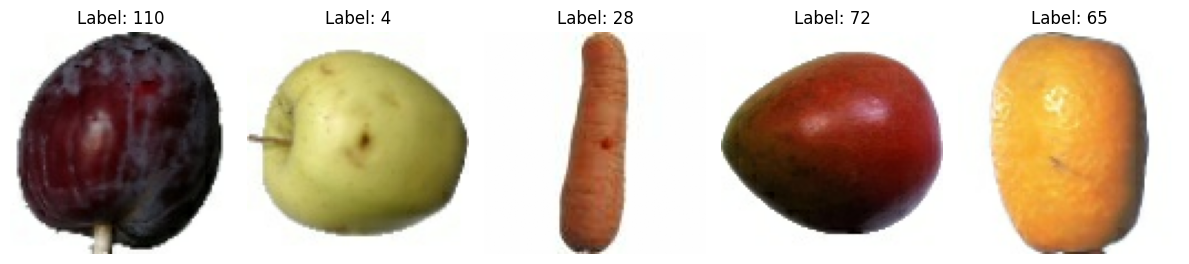

In [ ]:
# 6. Visualización de imágenes del conjunto de datos
def plot_sample_images(x, y, n=5):
    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.subplot(2, 5, i+1)
        plt.imshow(x[i].reshape(100, 100,3))
        plt.title(f"Label: {y[i].argmax()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Mostrar algunas imágenes del conjunto de entrenamiento
plot_sample_images(x_train, y_train)

In [ ]:
# 7. Graficar la precisión y pérdida
plt.figure(figsize=(12, 4))

plt.tight_layout()
plt.show()


<Figure size 1200x400 with 0 Axes>